## Purpose

Explore the various rank ordering charts
- Lift chart
- Cumulative lift chart
- Gains chart
- Lorenz curve
- Gini coefficient

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
def get_df_info(df):
  """Print basic dataframe info"""
  print(f"{'rows: ':>10}{df.shape[0]}")
  print(f"{'columns: ':>10}{df.shape[1]}")
  # data type, unique, missing for each field
  return pd.concat({
      'dtype': df.dtypes,
      'n unique': df.nunique(dropna=False),
      'n missing': df.isna().sum()
  }, axis=1).T

def display_wide_df(df, len=12):
  """Dislpay a wide dataframe soft-wrapped into multiple lines."""
  for i in range(0, df.shape[1], len):
    display(df.iloc[:, i:i+len])

## Data

In [3]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X = X.iloc[:,:30] # pick some features only

X0, Xt, y0, yt = train_test_split(X, y, test_size=0.25, random_state=1900, stratify=y)

In [4]:
df = pd.concat([X0, y0], axis=1)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
439,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,19.31,96.53,688.9,0.1034,0.1017,0.0626,0.08216,0.2136,0.06710,1
356,13.05,18.59,85.09,512.0,0.10820,0.13040,0.09603,0.05603,0.2035,0.06501,...,24.85,94.22,591.2,0.1343,0.2658,0.2573,0.12580,0.3113,0.08317,1
342,11.06,14.96,71.49,373.9,0.10330,0.09097,0.05397,0.03341,0.1776,0.06907,...,19.90,79.76,440.0,0.1418,0.2210,0.2299,0.10750,0.3301,0.09080,1
492,18.01,20.56,118.40,1007.0,0.10010,0.12890,0.11700,0.07762,0.2116,0.06077,...,26.06,143.40,1426.0,0.1309,0.2327,0.2544,0.14890,0.3251,0.07625,0
542,14.74,25.42,94.70,668.6,0.08275,0.07214,0.04105,0.03027,0.1840,0.05680,...,32.29,107.40,826.4,0.1060,0.1376,0.1611,0.10950,0.2722,0.06956,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,11.94,20.76,77.87,441.0,0.08605,0.10110,0.06574,0.03791,0.1588,0.06766,...,27.29,92.20,546.1,0.1116,0.2813,0.2365,0.11550,0.2465,0.09981,1
462,14.40,26.99,92.25,646.1,0.06995,0.05223,0.03476,0.01737,0.1707,0.05433,...,31.98,100.40,734.6,0.1017,0.1460,0.1472,0.05563,0.2345,0.06464,1
331,12.98,19.35,84.52,514.0,0.09579,0.11250,0.07107,0.02950,0.1761,0.06540,...,21.95,99.21,634.3,0.1288,0.3253,0.3439,0.09858,0.3596,0.09166,1
426,10.48,14.98,67.49,333.6,0.09816,0.10130,0.06335,0.02218,0.1925,0.06915,...,21.57,81.41,440.4,0.1327,0.2996,0.2939,0.09310,0.3020,0.09646,1


### EDA

In [5]:
(df
 .pipe(get_df_info)
 .pipe(display_wide_df, len=10)
)

    rows: 426
 columns: 31


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
n unique,360,365,402,410,375,406,405,409,340,384
n missing,0,0,0,0,0,0,0,0,0,0


,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
n unique,405,403,407,402,414,413,401,388,388,412
n missing,0,0,0,0,0,0,0,0,0,0


,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
n unique,352,395,393,414,333,396,406,375,385,405
n missing,0,0,0,0,0,0,0,0,0,0


,target
dtype,int64
n unique,2
n missing,0


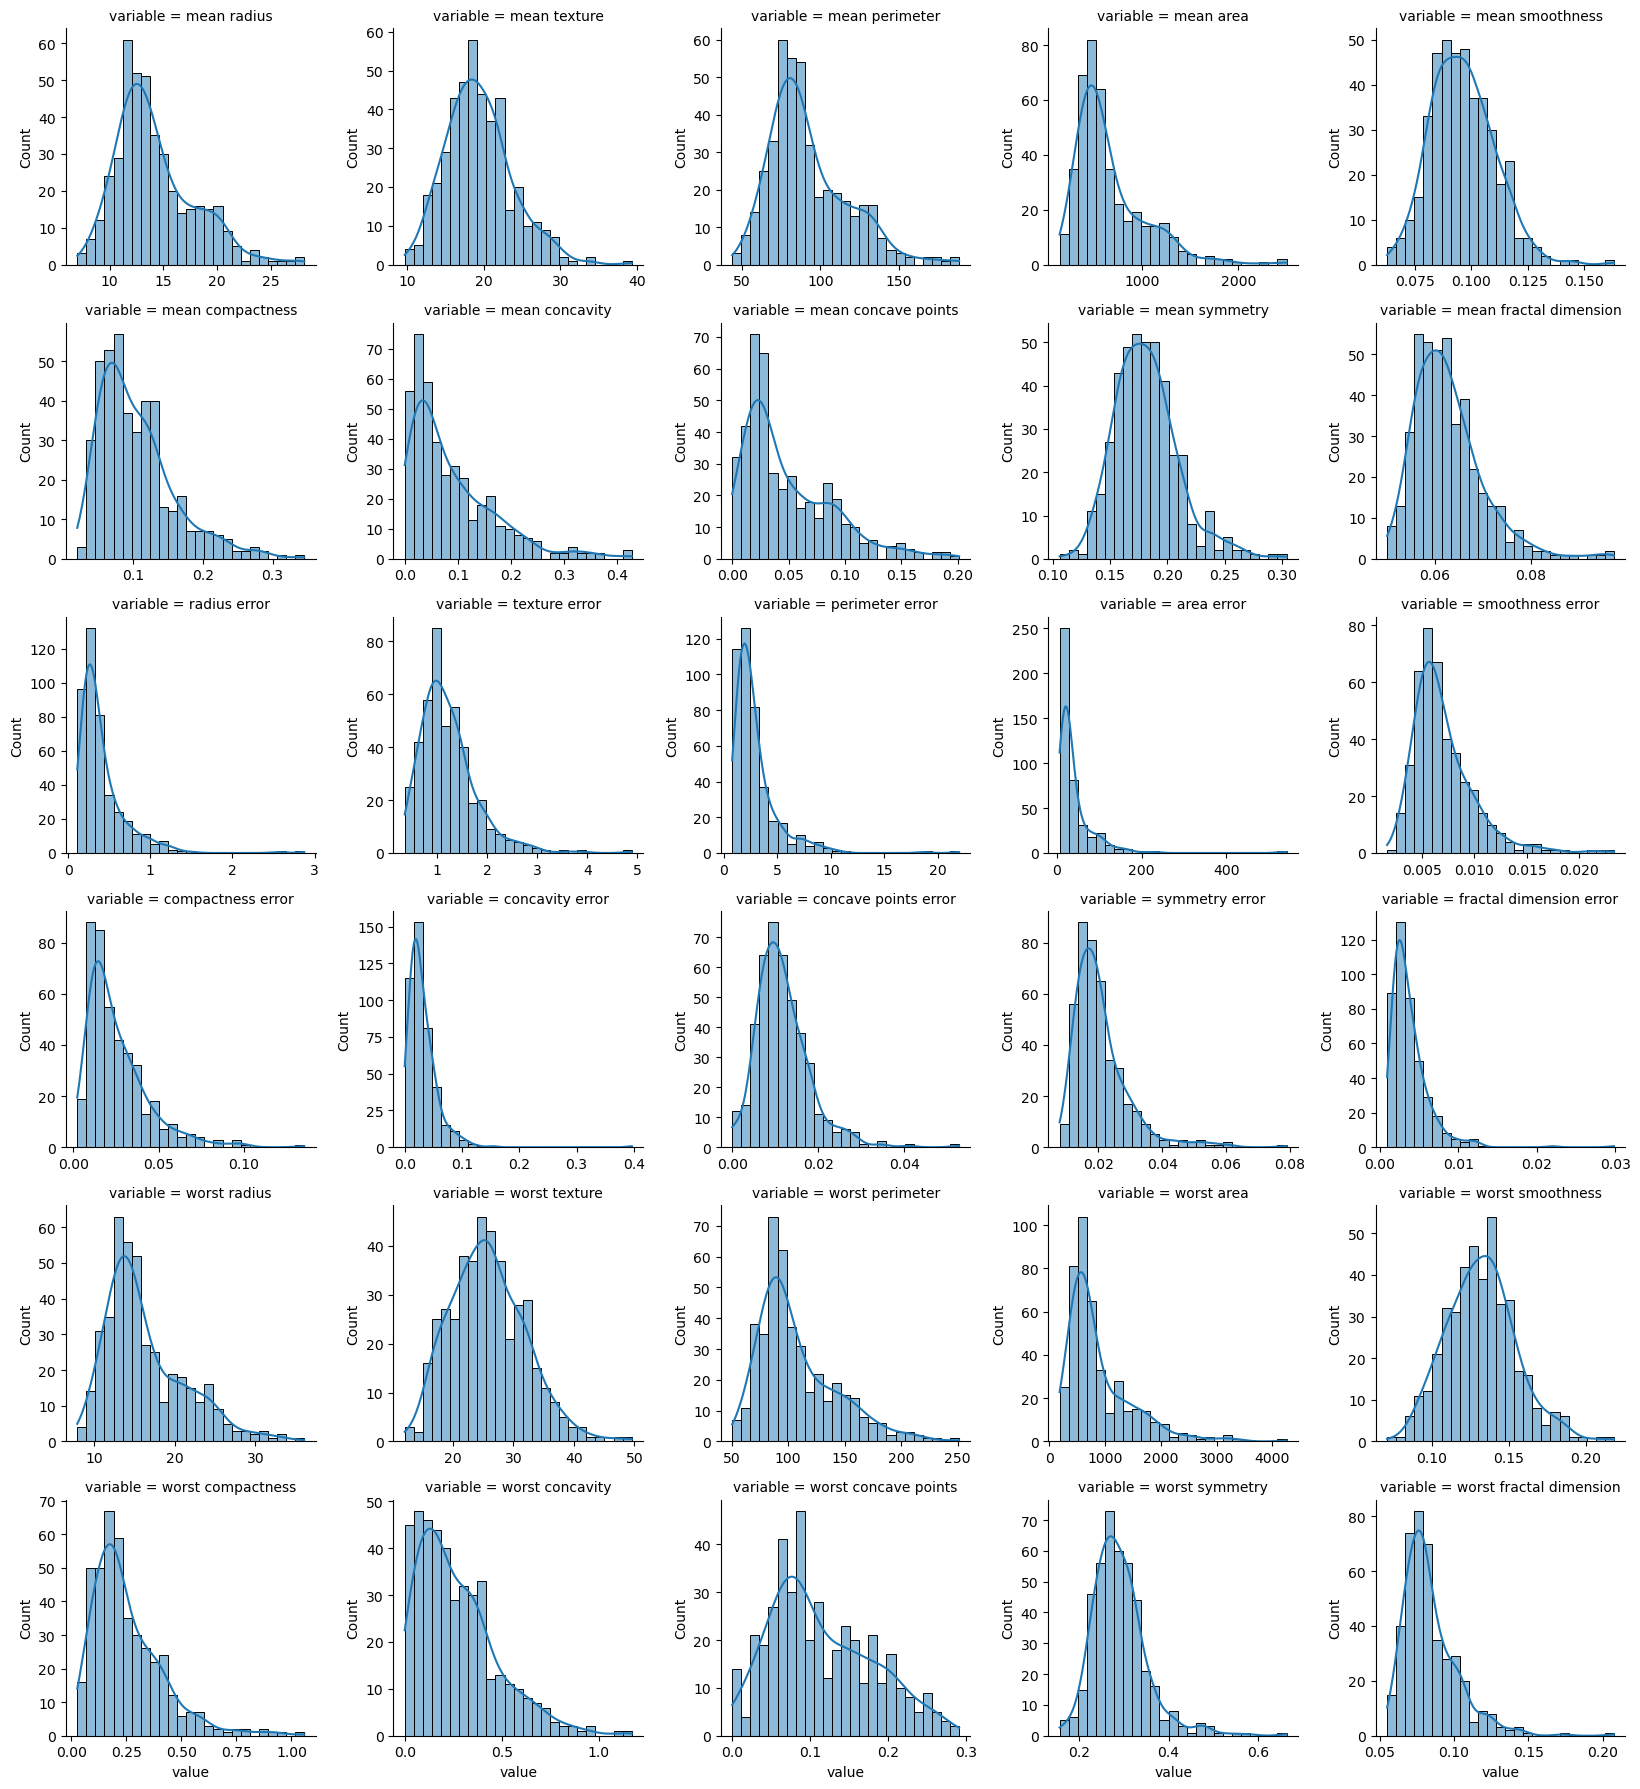

In [6]:
lf = df.melt(id_vars=['target'], ignore_index=True)
g = sns.FacetGrid(
    data = lf, col='variable',
    col_wrap=5, sharex=False, sharey=False,
    aspect=1.1
)
g.map_dataframe(sns.histplot, x='value', bins=25, kde=True)
plt.show()

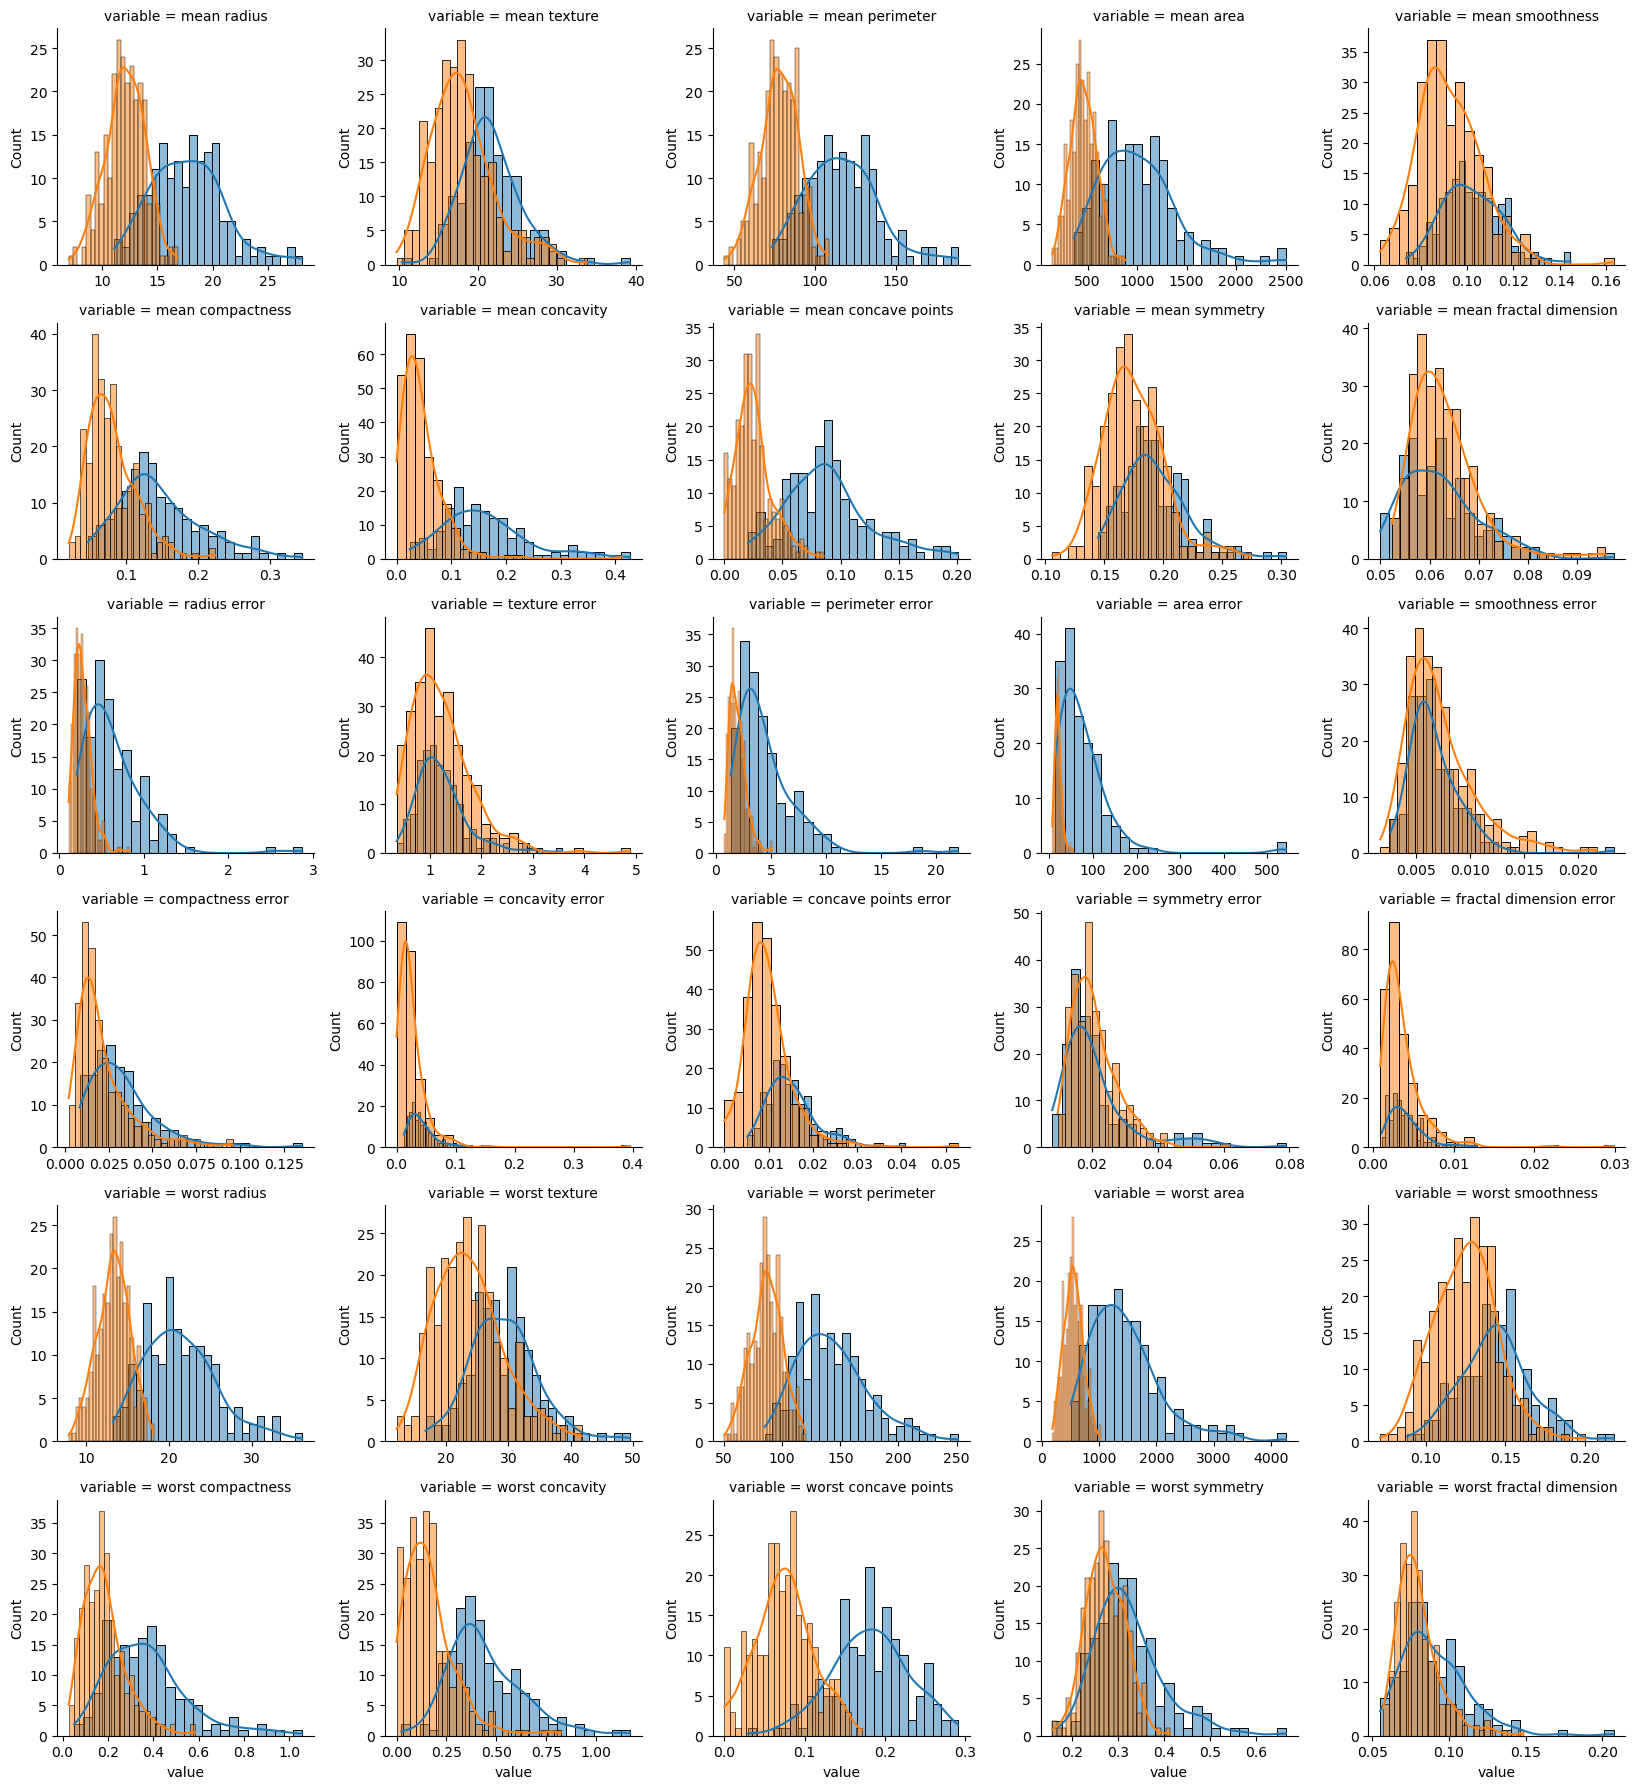

In [7]:
lf = df.melt(id_vars=['target'], ignore_index=True)
g = sns.FacetGrid(
    data = lf, col='variable', hue='target',
    col_wrap=5, sharex=False, sharey=False,
    aspect=1.1
)
g.map_dataframe(sns.histplot, x='value', bins=25, kde=True, common_norm=False)
plt.show()

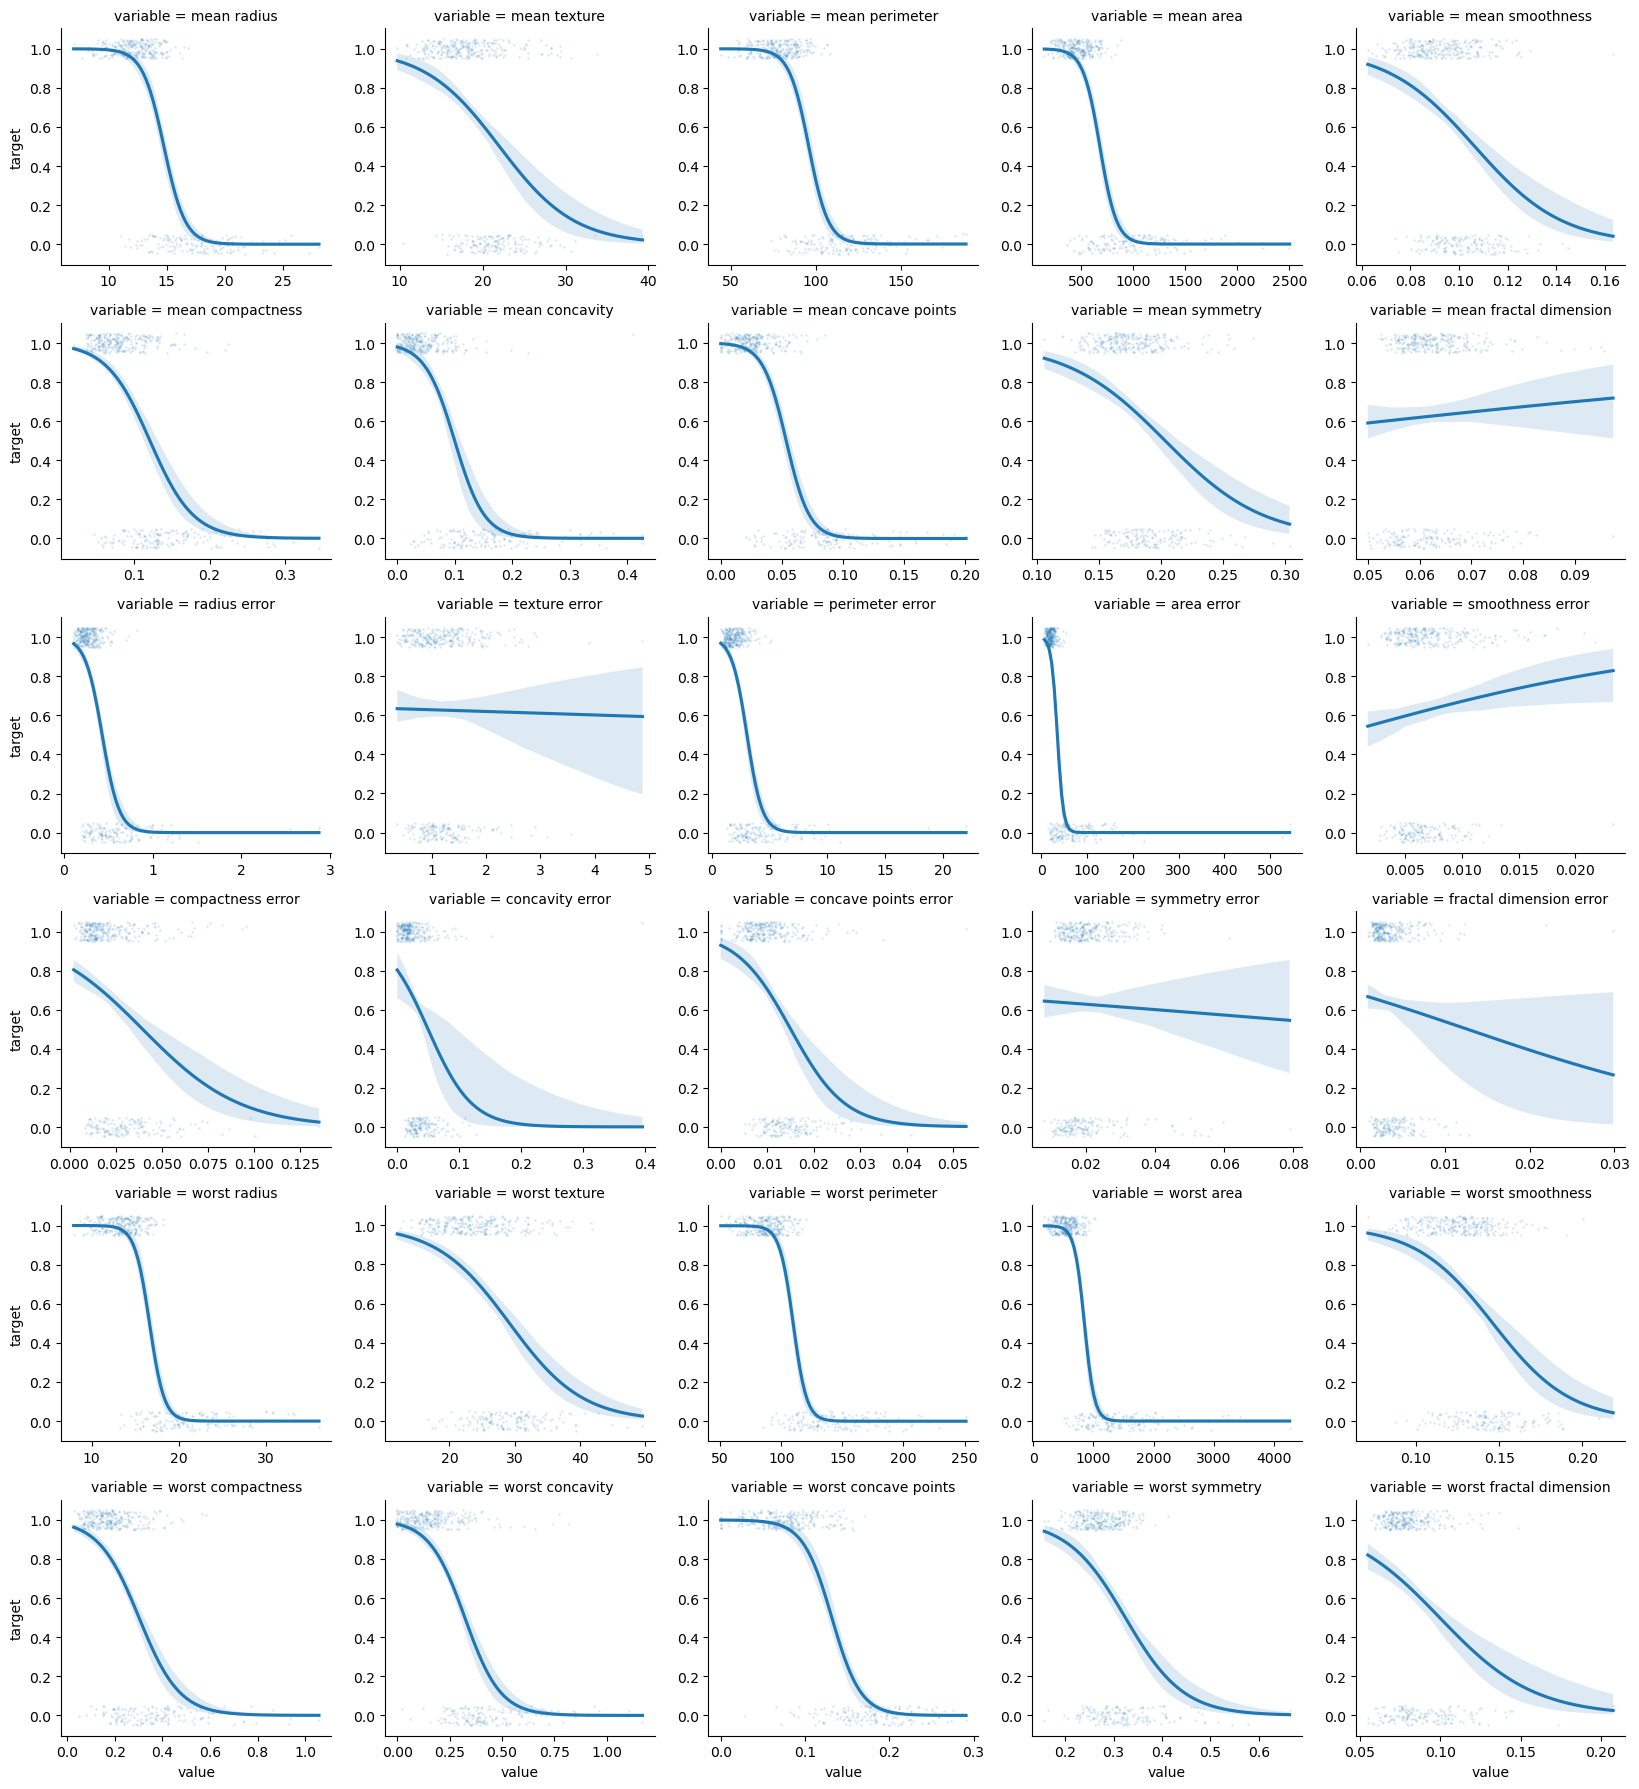

In [8]:
lf = df.melt(id_vars=['target'], ignore_index=True)
g = sns.FacetGrid(
    data = lf, col='variable', 
    col_wrap=5, sharex=False, sharey=False,
    aspect=1.1
)
g.map_dataframe(
    sns.regplot, x='value', y='target', 
    logistic=True, n_boot=100,
    y_jitter=0.05, scatter_kws={'s':1, 'alpha':0.1}
)
plt.show()

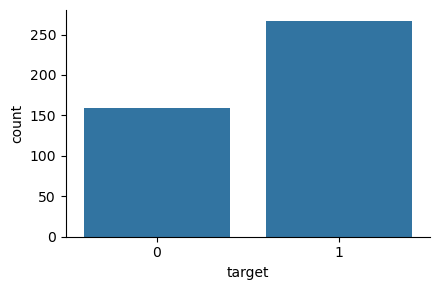

In [9]:
sns.catplot(data = df, x='target', kind='count', height=3, aspect=1.5)
plt.show()

## Model

In [10]:
X = X.iloc[:,[1,4]] # pick some weak predictor for modeling 

X0, Xt, y0, yt = train_test_split(X, y, test_size=0.25, random_state=1900, stratify=y)

In [11]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


### Linear Model

In [12]:
my_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

enet_to_fit = LogisticRegression(penalty='elasticnet', solver='saga', random_state=101, max_iter=10001)

enet_wflw = Pipeline([
    ('std_feat', StandardScaler()),
    ('regularize', enet_to_fit),
])

enet_grid = {
    'regularize__C': np.exp( np.linspace(-6, 6, num=11)), 
    'regularize__l1_ratio': np.linspace(0, 1, num=9)
}

In [13]:
enet_cv_out = GridSearchCV(enet_wflw, enet_grid, 
                           cv=my_cv, scoring=['accuracy','roc_auc'],
                           refit='roc_auc', n_jobs=4).fit(X0, y0)

In [14]:
enet_cv_out

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=101),
             estimator=Pipeline(steps=[('std_feat', StandardScaler()),
                                       ('regularize',
                                        LogisticRegression(max_iter=10001,
                                                           penalty='elasticnet',
                                                           random_state=101,
                                                           solver='saga'))]),
             n_jobs=4,
             param_grid={'regularize__C': array([2.47875218e-03, 8.22974705e-03, 2.73237224e-02, 9.07179533e-02,
       3.01194212e-01, 1.00000000e+00, 3.32011692e+00, 1.10231764e+01,
       3.65982344e+01, 1.21510418e+02, 4.03428793e+02]),
                         'regularize__l1_ratio': array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ])},
             refit='roc_auc', scoring=['accuracy', 'roc_auc'])

In [15]:
enet_cv_out.best_params_

{'regularize__C': 0.0024787521766663585, 'regularize__l1_ratio': 0.0}

In [16]:
enet_cv_out.best_score_

0.8174937116310873

In [17]:
print(enet_cv_out.best_estimator_.classes_)
yp_enet = enet_cv_out.predict_proba(Xt)[:,1]

[0 1]


## Rank Order 

In [18]:
enet_comp = pd.concat([pd.Series(yp_enet, name='pred'),
                     yt.reset_index(drop=True).rename('true')],
                    axis=1)

In [19]:
res_enet = (
    enet_comp
    # bin the predictions
    .assign(bin = lambda d: pd.qcut(d['pred'], q=10, labels=list(range(1,11))))
    # get summary stats
    .groupby('bin').agg(avg_event=('true', 'mean'),
                        sum_event=('true', 'sum'),
                        n=('true', 'size'))
    .sort_index(ascending=False) # highest first
    .assign(cum_event_rate1 = lambda d: d.sum_event.cumsum()/d.sum_event.sum())
    .sort_index(ascending=True) # lowest first
    .assign(cum_event_rate2 = lambda d: d.sum_event.cumsum()/d.sum_event.sum())
)
res_enet

/var/folders/qn/hd89zdf11gx8hl975t04md400000gn/T/ipykernel_42006/3172063911.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('bin').agg(avg_event=('true', 'mean'),


,avg_event,sum_event,n,cum_event_rate1,cum_event_rate2
bin,,,,,
1,0.000000,0,15,1.000000,0.000000
2,0.357143,5,14,1.000000,0.055556
3,0.428571,6,14,0.944444,0.122222
4,0.500000,7,14,0.877778,0.200000
5,0.533333,8,15,0.800000,0.288889
6,0.714286,10,14,0.711111,0.400000
7,0.928571,13,14,0.600000,0.544444
8,0.857143,12,14,0.455556,0.677778
9,1.000000,14,14,0.322222,0.833333


Rank order: order predictions and create ranked bins, then compute the observed average, sum, or cumulative sum in each bin. 
- Tell if a model performs better/worse in certain groups
- Measure how well a model can distinguish extreme cases
- Compare a model to random model (baseline)

### Lift Chart


- Observed average per predicted bin. 
- If model is random guess, then we should see each bin have a constant value.

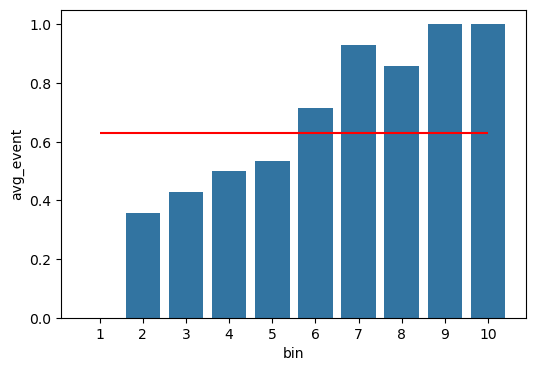

In [20]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(res_enet, x='bin', y='avg_event')
ax.hlines(y=enet_comp.true.mean(),xmin=0,xmax=9,color='r')
plt.show()

### Gains Chart

Gain at a given decile level is the ratio of cumulative number of targets (events) up to that decile to the total number of targets (events) in the entire data set.
- Cumulative sum of events per predicted bin / total evevnts, highest ranked first.
- If a model is random guess, we should see cumulative gains along main diagonal.
- 40% of data could predict 50% of positive events

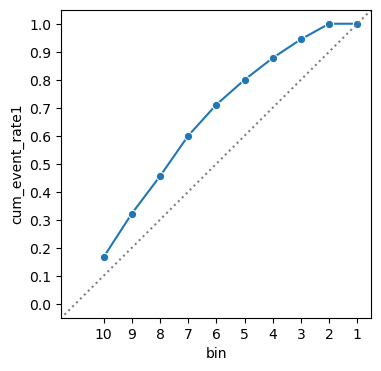

In [21]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.lineplot(res_enet, x='bin', y='cum_event_rate1', marker='o').invert_xaxis()
ax.set_xticks(range(11))
ax.set_yticks(np.linspace(0, 1, 11))
ax.axline((11,0),(1,1), color='grey', linestyle=':')
plt.show()

### Lorenz Curve


- Cumulative sum per predicted bin, lowest ranked first.
- If a model is random guess, should see a diagonal line (10% population predict 10% events).
- First 20% of observations account for 5% of events - least risky



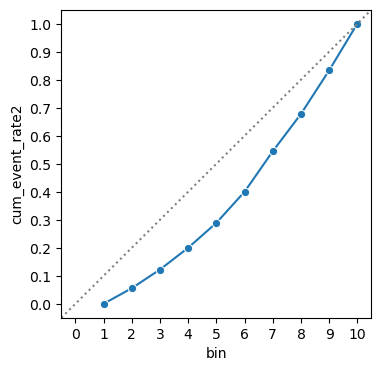

In [22]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.lineplot(res_enet, x='bin', y='cum_event_rate2', marker='o')
ax.set_xticks(range(11))
ax.set_yticks(np.linspace(0, 1, 11))
ax.axline((0,0), (10,1), color='grey',linestyle=':')
plt.show()